In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
iteration = 40
lambda1 = 0.1
LRate = 0.01
error_list_01 = list()
m = 943
n = 1682
k = 20

P = np.random.rand(n,k)*math.sqrt(5/k)
Q = np.random.rand(m,k)*math.sqrt(5/k)

In [ ]:
error_list_08 = list()
error_list_06 = list()
error_list_05 = list()

In [3]:
def PQ_update(vec1, vec2, error, lambda1):
    return(error*vec1 - 2*lambda1*vec2)

In [4]:
for i in range(iteration):
    # update Q and P
    with open("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q3/data/ratings.train.txt") as f:
        for line in f:
            movie_id, user_id, rating = [int(i) for i in line.split()]
            error = 2 *(rating - Q[movie_id-1].dot(P[user_id-1]))

            addQ = PQ_update(P[user_id-1], Q[movie_id-1], error, lambda1)
            addP = PQ_update(Q[movie_id-1], P[user_id-1], error, lambda1)

            Q[movie_id-1] = Q[movie_id-1] + LRate*addQ
            P[user_id-1] = P[user_id-1] + LRate*addP

    # calculate total error in this iteration
    error_sum = 0
    with open("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q3/data/ratings.train.txt") as f:
        for line in f:
            movie_id, user_id, rating = [int(i) for i in line.split()]
            error_sum += pow(rating - Q[movie_id-1].dot(P[user_id-1]), 2)
        error_sum = error_sum + pow(P,2).sum() + pow(Q,2).sum()
    error_list_01.append(error_sum)

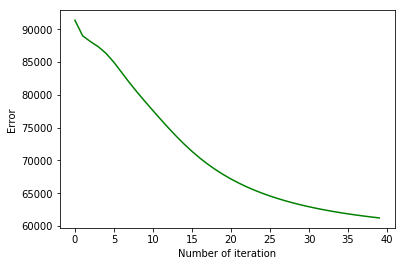

In [7]:
# plt.plot(error_dict[0.001])
# plt.plot(error_dict[0.01])
# plt.plot(error_dict[0.05])
# plt.plot(error_dict[0.1])

#plt.plot(error_list_08)
plt.plot(error_list_01, color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
error_list_01